In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

root_folder = exp_path = Path().absolute().parent / "experiments" 

# Get latest generated folder
subfolder_list = [f for f in root_folder.iterdir()]
subfolder_list_creation_time = [f.stat().st_ctime for f in subfolder_list]
latest_subfolder_idx =  subfolder_list_creation_time.index(max(subfolder_list_creation_time))
experiment_path = subfolder_list[latest_subfolder_idx]

# Read CSV results
df = pd.read_csv(experiment_path / "results.csv")


In [74]:
# Config file
with open(experiment_path / "config.yml") as f:
     print(f.read())

experiment_name: simple
n_repeats: 5
scenario_params_list:
 - partners_count: 
     - 3
   amounts_per_partner: 
     - [0.7, 0.1, 0.2] 
   samples_split_option: 
     - 'random'
     - 'stratified'
   aggregation_weighting: 
     - 'uniform'
   minibatch_count: 
     - 10
     - 5
   gradient_updates_per_pass_count:
     - 8
     - 4
 - partners_count: 
     - 2
   amounts_per_partner: 
     - [0.95, 0.05]
   samples_split_option: 
     - 'random'
     - 'stratified'
   aggregation_weighting: 
     - 'uniform'
   minibatch_count: 
     - 10
     - 5
   gradient_updates_per_pass_count:
     - 8
     - 4



In [79]:
scenario_ids = df.scenario_id.unique()
random_states = df.random_state.unique()
samples_split_options = df.samples_split_option.unique()

print('Random state', random_states)
print('Scenario id', scenario_ids)
print()

df.info()
df.head(20)

Random state [0 1 2 3 4]
Scenario id [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 21 columns):
aggregation_weighting              80 non-null object
amounts_per_partner                80 non-null object
dataset_name                       80 non-null object
epoch_count                        80 non-null float64
federated_computation_time_sec     80 non-null float64
federated_test_score               80 non-null float64
final_relative_nb_samples          80 non-null object
gradient_updates_per_pass_count    80 non-null float64
is_early_stopping                  80 non-null float64
minibatch_count                    80 non-null float64
nb_samples_used                    80 non-null float64
partners_count                     80 non-null float64
samples_split_option               80 non-null object
scenario_name                      80 non-null object
short_scenario_name                80 non-nul

,aggregation_weighting,amounts_per_partner,dataset_name,epoch_count,federated_computation_time_sec,federated_test_score,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,minibatch_count,...,partners_count,samples_split_option,scenario_name,short_scenario_name,single_partner_test_mode,test_data_samples_count,train_data_samples_count,random_state,scenario_id,computation_time_minutes
0,uniform,"[0.7, 0.1, 0.2]",MNIST,40.0,554.500027,0.9857,"[0.7, 0.1, 0.2]",8.0,1.0,10.0,...,3.0,random,"random_3_[0.7, 0.1, 0.2]_['not_corrupted', 'no...","random[0.7, 0.1, 0.2] mb 10.0",global,10000.0,48000.0,0,0,9.241667
1,uniform,"[0.7, 0.1, 0.2]",MNIST,40.0,616.202794,0.9867,"[0.7, 0.1, 0.2]",4.0,1.0,10.0,...,3.0,random,"random_3_[0.7, 0.1, 0.2]_['not_corrupted', 'no...","random[0.7, 0.1, 0.2] mb 10.0",global,10000.0,48000.0,0,1,10.270047
2,uniform,"[0.7, 0.1, 0.2]",MNIST,40.0,286.700292,0.9876,"[0.7, 0.1, 0.2]",8.0,1.0,5.0,...,3.0,random,"random_3_[0.7, 0.1, 0.2]_['not_corrupted', 'no...","random[0.7, 0.1, 0.2] mb 5.0",global,10000.0,48000.0,0,2,4.778338
3,uniform,"[0.7, 0.1, 0.2]",MNIST,40.0,346.790477,0.9867,"[0.7, 0.1, 0.2]",4.0,1.0,5.0,...,3.0,random,"random_3_[0.7, 0.1, 0.2]_['not_corrupted', 'no...","random[0.7, 0.1, 0.2] mb 5.0",global,10000.0,48000.0,0,3,5.779841
4,uniform,"[0.7, 0.1, 0.2]",MNIST,40.0,505.301117,0.6143,"[0.7, 0.1, 0.2]",8.0,1.0,10.0,...,3.0,stratified,"stratified_3_[0.7, 0.1, 0.2]_['not_corrupted',...","stratified[0.7, 0.1, 0.2] mb 10.0",global,10000.0,48000.0,0,4,8.421685
5,uniform,"[0.7, 0.1, 0.2]",MNIST,40.0,504.394837,0.6938,"[0.7, 0.1, 0.2]",4.0,1.0,10.0,...,3.0,stratified,"stratified_3_[0.7, 0.1, 0.2]_['not_corrupted',...","stratified[0.7, 0.1, 0.2] mb 10.0",global,10000.0,48000.0,0,5,8.406581
6,uniform,"[0.7, 0.1, 0.2]",MNIST,40.0,104.459746,0.3461,"[0.7, 0.1, 0.2]",8.0,1.0,5.0,...,3.0,stratified,"stratified_3_[0.7, 0.1, 0.2]_['not_corrupted',...","stratified[0.7, 0.1, 0.2] mb 5.0",global,10000.0,48000.0,0,6,1.740996
7,uniform,"[0.7, 0.1, 0.2]",MNIST,40.0,87.734051,0.4099,"[0.7, 0.1, 0.2]",4.0,1.0,5.0,...,3.0,stratified,"stratified_3_[0.7, 0.1, 0.2]_['not_corrupted',...","stratified[0.7, 0.1, 0.2] mb 5.0",global,10000.0,48000.0,0,7,1.462234
8,uniform,"[0.95, 0.05]",MNIST,40.0,426.549023,0.9846,"[0.95, 0.05]",8.0,1.0,10.0,...,2.0,random,"random_2_[0.95, 0.05]_['not_corrupted', 'not_c...","random[0.95, 0.05] mb 10.0",global,10000.0,48000.0,0,8,7.109150
9,uniform,"[0.95, 0.05]",MNIST,40.0,329.725104,0.9867,"[0.95, 0.05]",4.0,1.0,10.0,...,2.0,random,"random_2_[0.95, 0.05]_['not_corrupted', 'not_c...","random[0.95, 0.05] mb 10.0",global,10000.0,48000.0,0,9,5.495418


In [76]:
df["computation_time_minutes"] = df.federated_computation_time_sec / 60
df.short_scenario_name = df.samples_split_option + df.amounts_per_partner + ' mb ' + df.minibatch_count.astype(str)
df.short_scenario_name.unique()
#df.contributivity_method = df.contributivity_method.str.replace('values', '')

array(['random[0.7, 0.1, 0.2] mb 10.0', 'random[0.7, 0.1, 0.2] mb 5.0',
       'stratified[0.7, 0.1, 0.2] mb 10.0',
       'stratified[0.7, 0.1, 0.2] mb 5.0', 'random[0.95, 0.05] mb 10.0',
       'random[0.95, 0.05] mb 5.0', 'stratified[0.95, 0.05] mb 10.0',
       'stratified[0.95, 0.05] mb 5.0'], dtype=object)

In [77]:
# Helper function for plot
def get_x_tick_amount(df, scenario_id, partners_ids):
    
    x_ticks = []
    for partner_id in partners_ids:
        current_df = df[(df.scenario_id == scenario_id) & (df.partner_id == partner_id)]
        amount = current_df.amount_per_partner.unique()

        assert(len(amount) == 1)
        amount = amount[0]
    
        x_ticks.append('partner_' + str(partner_id) + ' ' + str(amount))
    return x_ticks




##################
scenario_id: 0
scenario name: Id 0 - 3 [0.7, 0.1, 0.2]


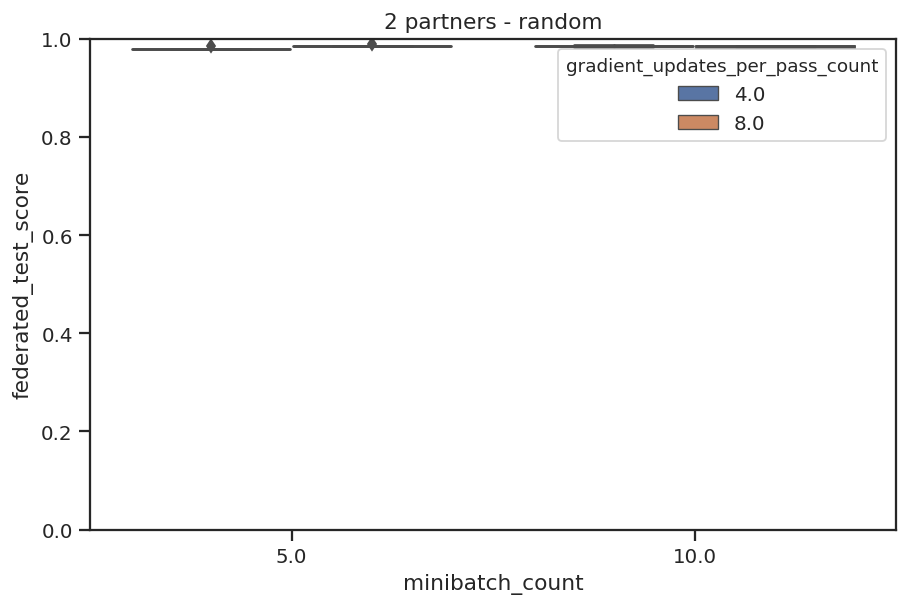

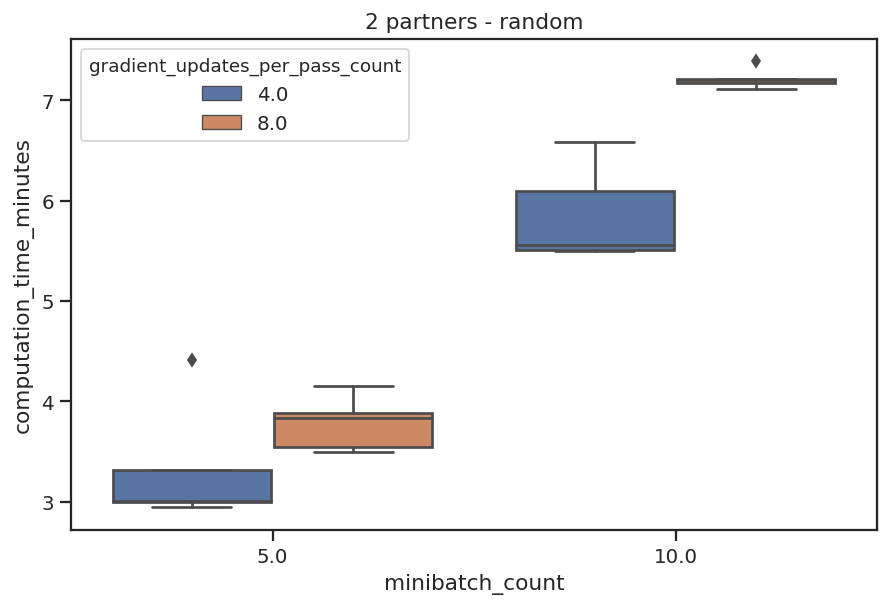




##################
scenario_id: 0
scenario name: Id 0 - 3 [0.7, 0.1, 0.2]


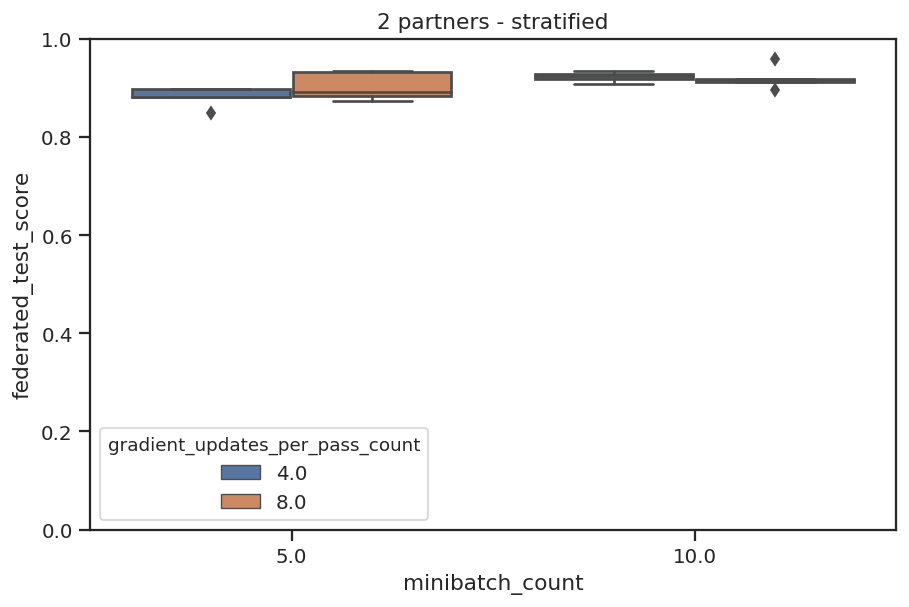

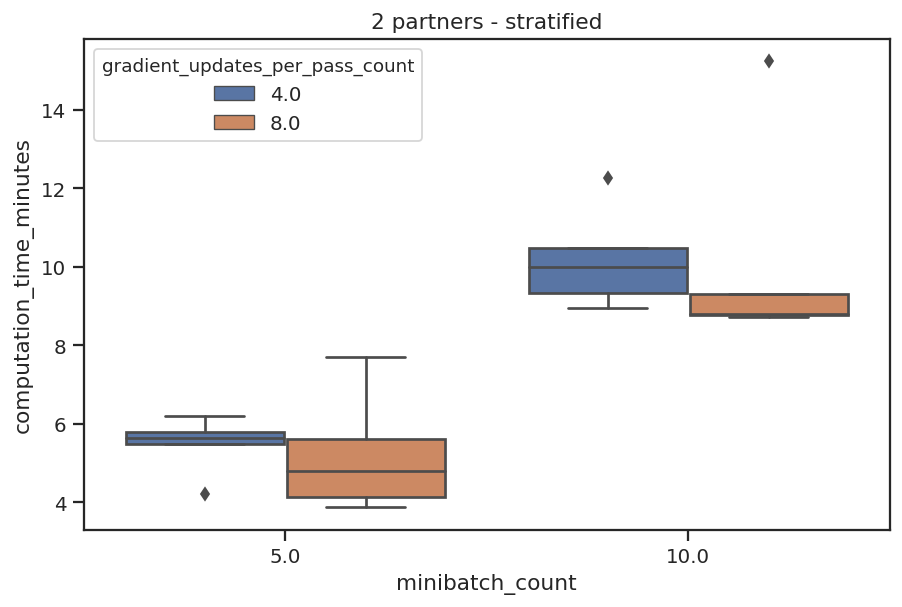




##################
scenario_id: 0
scenario name: Id 0 - 3 [0.7, 0.1, 0.2]


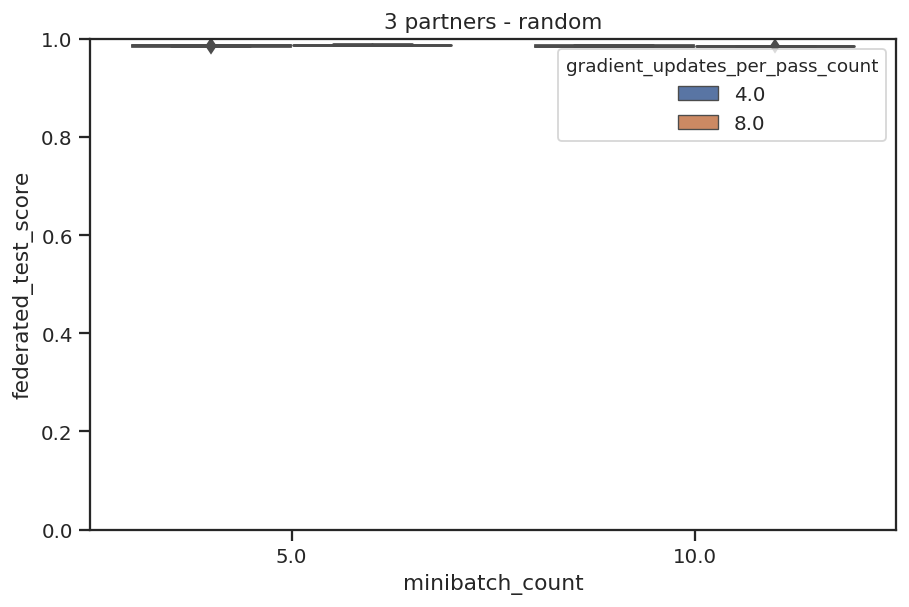

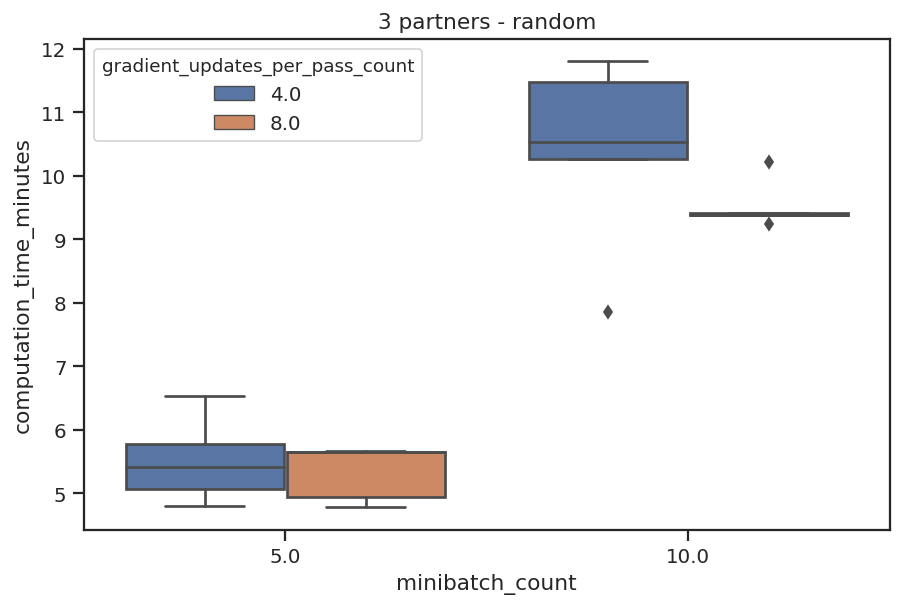




##################
scenario_id: 0
scenario name: Id 0 - 3 [0.7, 0.1, 0.2]


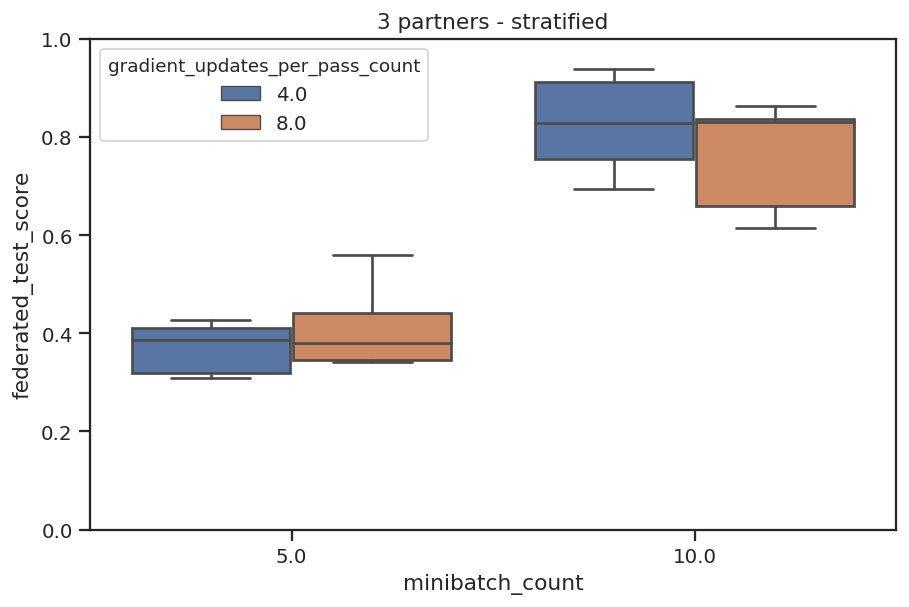

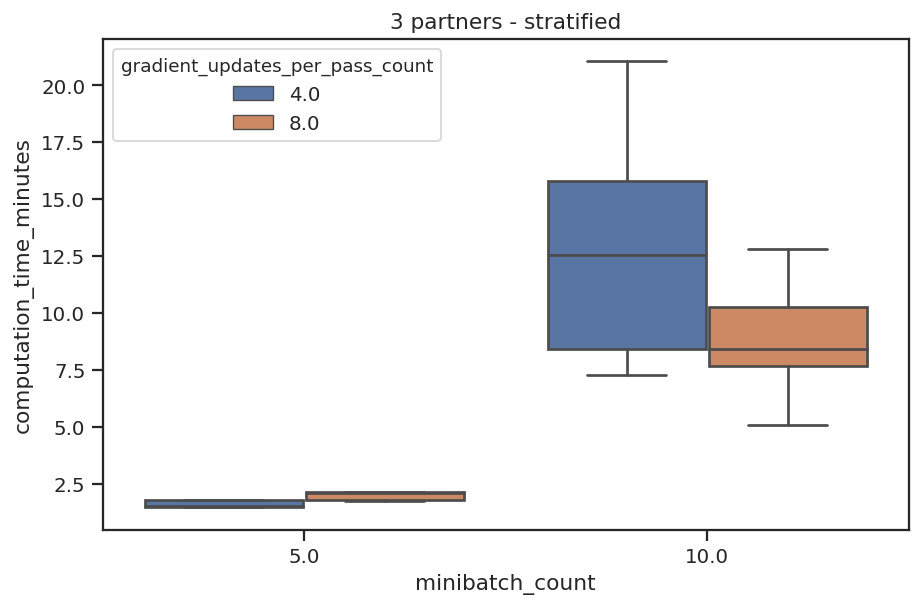

In [87]:
# Plot loop
for partners_count in [2, 3]:
    for samples_split_option in samples_split_options:
        
        current_df = df[(df.partners_count == partners_count) & (df.samples_split_option == samples_split_option)]
        #scenario_name = "Id " + str(scenario_id) + " - " + current_df.short_scenario_name.iloc[0]
        #partners_ids = current_df.partner_id.unique()
        print("")
        print("")
        print("")
        print("##################")
        print("scenario_id:", scenario_id)
        print("scenario name:", scenario_name)
        sns.set(style="ticks")
        #current_df.info()
        title = str(partners_count) + " partners" + ' - ' + samples_split_option
        plt.figure(figsize=(8, 5), dpi=130)
        plt.title(title)

        sns.boxplot(x="minibatch_count", y="federated_test_score", hue="gradient_updates_per_pass_count",
                         data=current_df)
        plt.ylim([0, 1])


        ax = plt.figure(figsize=(8, 5), dpi=130)
        plt.title(title)
        sns.boxplot(x="minibatch_count", y="computation_time_minutes", hue="gradient_updates_per_pass_count",
                         data=current_df)
        #plt.xticks(partners_ids, get_x_tick_amount(current_df, scenario_id, partners_ids))
        #plt.ylim([0, 1])


        plt.show()
    

In [ ]:
# Plot loop
for scenario_id in scenario_ids:
    
    current_df = df[df.scenario_id == scenario_id]
    scenario_name = "Id " + str(scenario_id) + " - " + current_df.short_scenario_name.iloc[0]
    partners_ids = current_df.partner_id.unique()
    print("")
    print("")
    print("")
    print("##################")
    print("scenario_id:", scenario_id)
    print("scenario name:", scenario_name)
    print("aggregation_weighting:", current_df.aggregation_weighting.iloc[0])
    print("minibatch_count:", current_df.minibatch_count.iloc[0])
    sns.set(style="ticks")
    #current_df.info()
    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(scenario_name)
    ax = sns.swarmplot(y="federated_test_score",
                       data=current_df)
    plt.ylim([0, 1])

        
    ax = plt.figure(figsize=(10, 6), dpi=120)
    plt.title(scenario_name)
    sns.swarmplot(x="partner_id", y="contributivity_score", hue="contributivity_method",
                     data=current_df)
    plt.xticks(partners_ids, get_x_tick_amount(current_df, scenario_id, partners_ids))
    plt.ylim([0, 1])


    plt.figure(figsize=(15, 6), dpi=120)
    plt.title(scenario_name)
    ax = sns.swarmplot(x="contributivity_method", y="computation_time_minutes",
                     data=current_df)
    
    plt.figure(figsize=(15, 6), dpi=120)
    plt.title(scenario_name)
    ax = sns.swarmplot(x="contributivity_method", y="first_characteristic_calls_count",
                     data=current_df)
    
    plt.show()